<a href="https://colab.research.google.com/github/Safasal/DeepLearning/blob/main/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


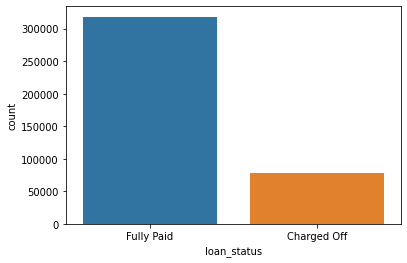

In [8]:
sns.countplot(x= 'loan_status', data=df)

In [9]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

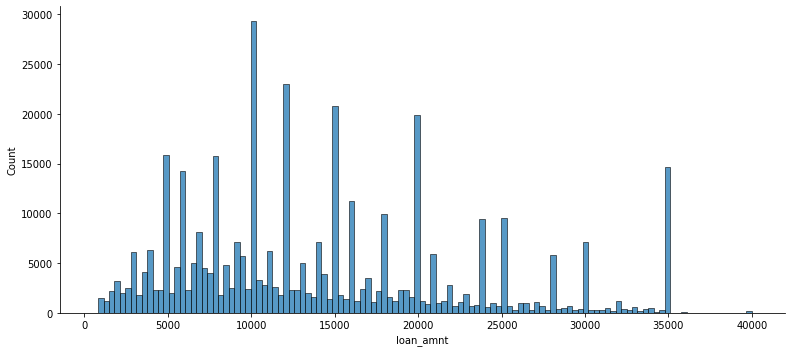

In [10]:
sns.displot(x= 'loan_amnt', data=df, aspect=11.7/5.27 )

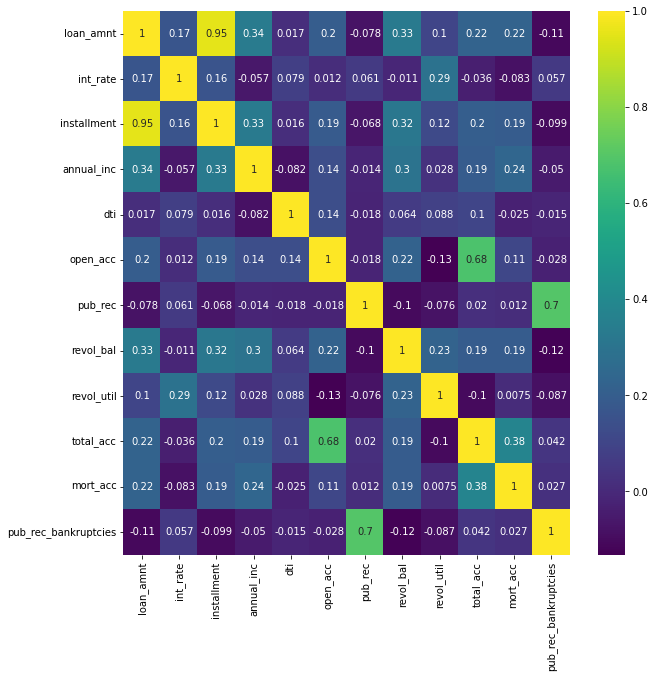

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

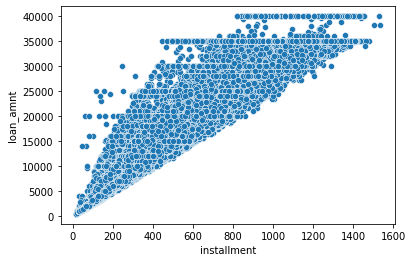

In [12]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

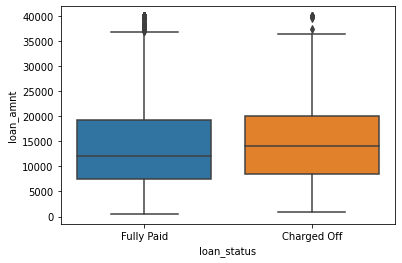

In [13]:
sns.boxplot(x= 'loan_status', y='loan_amnt', data=df)

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

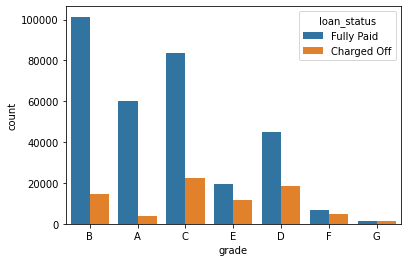

In [17]:
sns.countplot(x='grade', data=df, hue='loan_status')

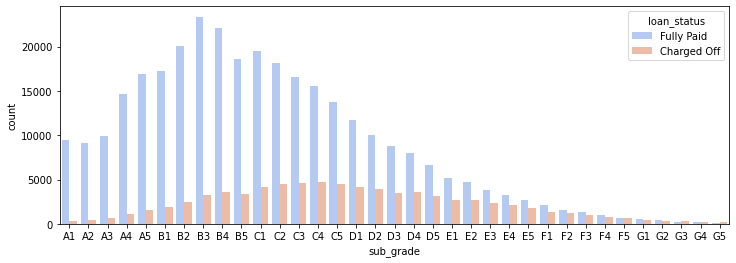

In [18]:
plt.figure(figsize=(12,4))
order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=order, palette='coolwarm', hue='loan_status')

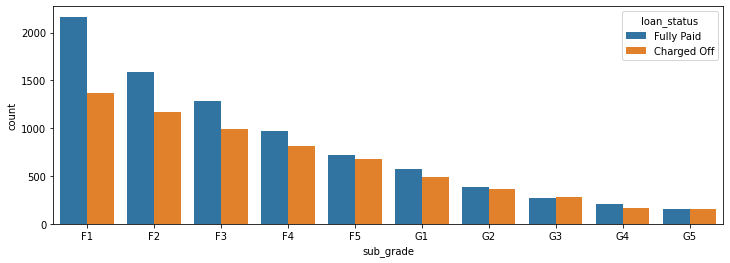

In [19]:
f_and_g= df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=(12,4))
order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data= f_and_g, order=order, hue='loan_status')

In [20]:
df['loan_repaid']=df['loan_status'].replace(('Fully Paid', 'Charged Off'), (1,0))

In [21]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


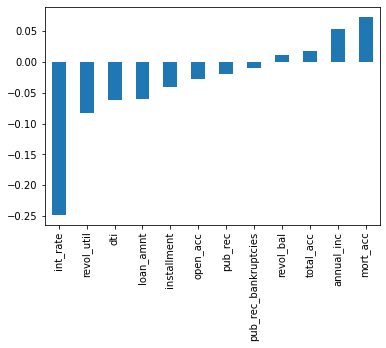

In [22]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [23]:
len(df)

396030

In [24]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [25]:
100* df.isna().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [26]:
df['emp_title'].nunique()

173105

In [27]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
df.drop('emp_title', axis=1, inplace=True)

In [29]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
order_emp_len =['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

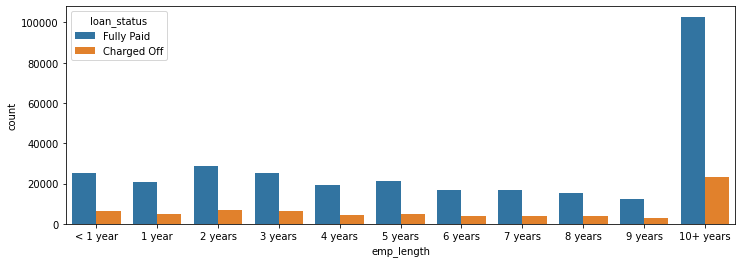

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x= 'emp_length', data= df, order=order_emp_len, hue= 'loan_status')

In [32]:
fp= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [33]:
co= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [34]:
x= co/(co+fp)

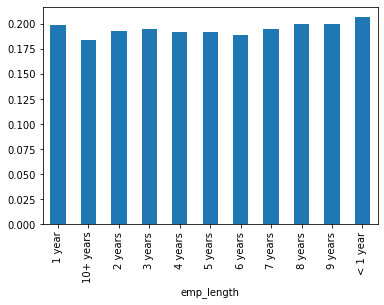

In [35]:
x.plot(kind='bar')

In [36]:
df.drop('emp_length', axis=1, inplace=True)

In [37]:
df.drop('title', axis=1, inplace=True)

In [38]:
#mort_acc: Number of mortgage accounts.
#total_acc: The total number of credit lines currently in the borrower's credit file

In [39]:
df[['mort_acc', 'total_acc']].tail()

,mort_acc,total_acc
396025,0.0,23.0
396026,1.0,8.0
396027,0.0,23.0
396028,5.0,20.0
396029,NaN,19.0


In [40]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [41]:
acc_ave= df.groupby('total_acc').mean()['mort_acc']

In [42]:
def fill_mor_acc (total_acc, mort_acc):
  if np.isnan(mort_acc):
    return acc_ave[total_acc]
  else:
    return mort_acc

In [43]:
df['mort_acc']= df.apply(lambda x: fill_mor_acc(x['total_acc'], x['mort_acc']), axis=1)

In [44]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [45]:
df= df.dropna()

In [46]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [47]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [48]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [49]:
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [50]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [51]:
df.drop('grade', axis=1, inplace=True)

In [52]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [53]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df= pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [54]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [55]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df= pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [56]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [57]:
df['home_ownership']= df['home_ownership'].replace(['NONE', 'ANY' ], 'OTHER')

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [59]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df= pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [60]:
df['zip_code']=df['address'].apply(lambda x: x[-5:])

In [61]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [62]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [63]:
df.drop('address', axis=1, inplace=True)

In [64]:
df.drop('issue_d', axis=1, inplace=True)

In [65]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [66]:
df['earliest_cr_line']= df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [67]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [68]:
df.drop('loan_status', axis=1, inplace=True)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X= df.drop('loan_repaid', axis=1).values
y= df['loan_repaid'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [72]:
#df.sample(frac=0.1, random_state=101) if the data too big for my computer i can take a sample

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [77]:
X_train.shape

(316175, 78)

In [78]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')


In [79]:
pwd

'/content'

In [91]:
import os
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
early_stop = EarlyStopping(monitor='val_loss', patience=5)

datetime.now().strftime("%Y%m%d-%H%M%S")
log_directory = 'logs\fit' #+ datetime.now().strftime("%Y%m%d-%H%M%S")
board = TensorBoard(log_dir=log_directory, histogram_freq=1)

logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
board = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [92]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test, y_test), callbacks=[early_stop, board])

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3000 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2655 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2628 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2617 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2607 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2595 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2594 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.259

In [ ]:
!tensorboard dev upload --logdir logs --name "neural net"  

2023-01-14 00:44:37.422131: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('mymodel.h5')

In [ ]:
losses= pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred = model.predict(X_test)
pred = np.round(pred).astype(int)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
df['loan_repaid'].value_counts()

In [ ]:
317696/len(df)

In [ ]:
import random
random.seed(101)

random_int = random.randint(0, len(df))

In [ ]:
new_customer= df.drop('loan_repaid', axis=1).iloc[random_int]
new_customer

In [ ]:
type(new_customer)

In [ ]:
new_customer= scaler.transform(new_customer.values.reshape(1,78))

In [ ]:
model.predict(new_customer)

In [ ]:
np.round(model.predict(new_customer)).astype(int)

In [ ]:
df.iloc[random_int]['loan_repaid']